# DTEK0042 Exercise 2
    Group Members:
        1. Usairim Isani
        2. Risto Luukkonen
        3. Jonathan Costa

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze an ECG signal step-by-step as outlined below. The deliverables for this exercise are a jupyter notebook in both .ipynb and .html format. Please provide caption for every figure and include description for every figure. 

## library Imports

In [25]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”. 
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz. 
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal) 
     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

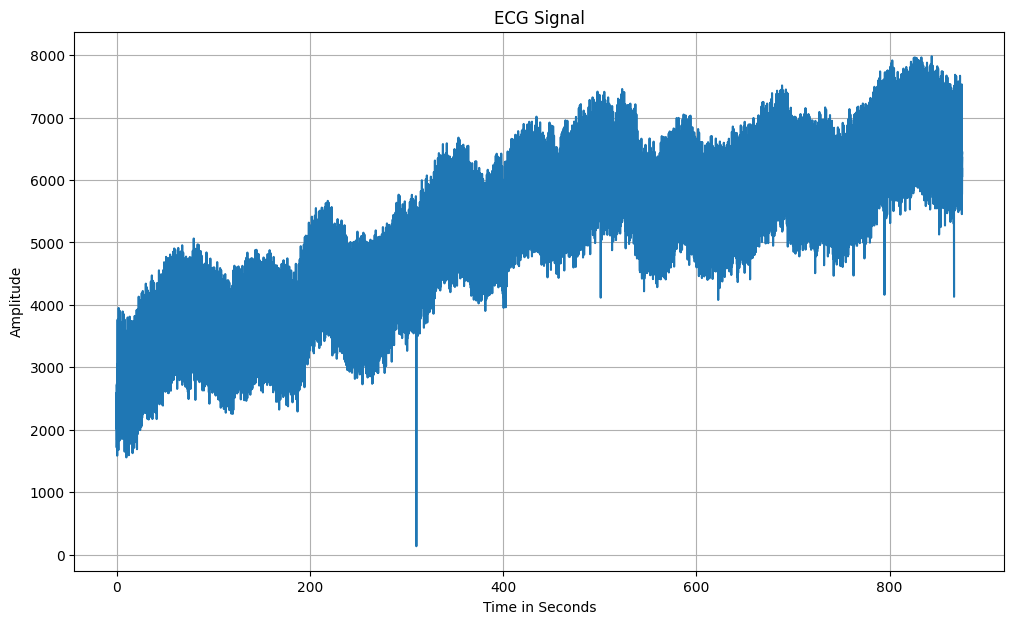

In [26]:
#code
ECG_sig = np.loadtxt("ECG_800hz.txt")

Fs = 800
T = 1 / Fs # Sampling frequency is 800Hz. Time period in T = 1/F
N = len(ECG_sig)

t = np.linspace(0,((N-1)/Fs),N)


# Plot
plt.figure(figsize=(12,7))
plt.plot(t ,ECG_sig)
plt.xlabel("Time in Seconds")
plt.ylabel("Amplitude")
plt.title("ECG Signal")
plt.grid()
plt.show()


# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. Take only the positive frequencies from the computed DFT and subsequently calculate the magnitude (absolute value) of frequency content. Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and replot the magnitude versus frequency.
 

     * HINT use scipy.fft.rfft() outputs positive portion of function 
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

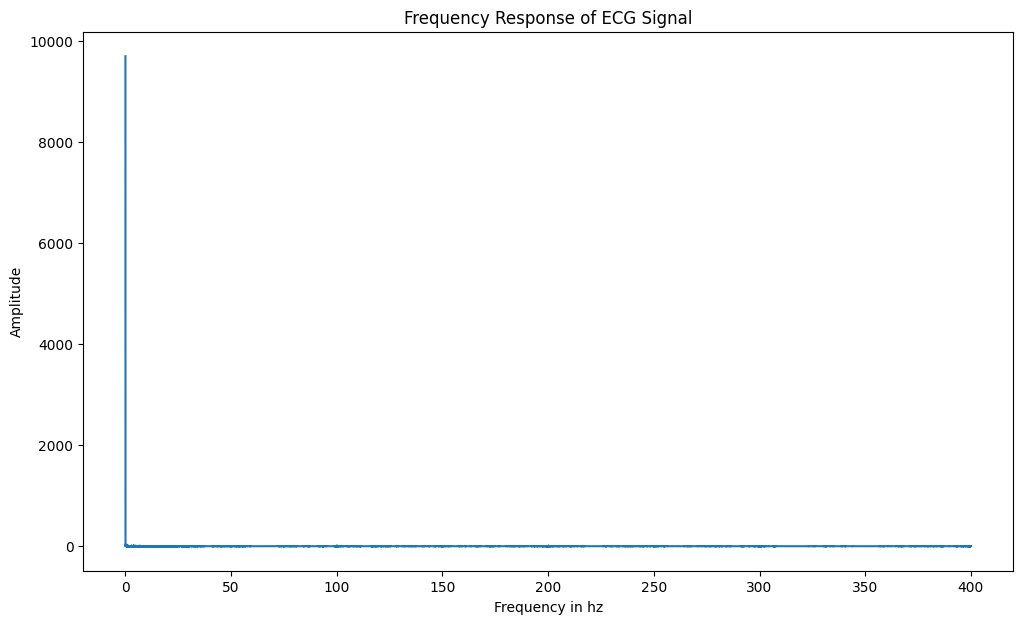

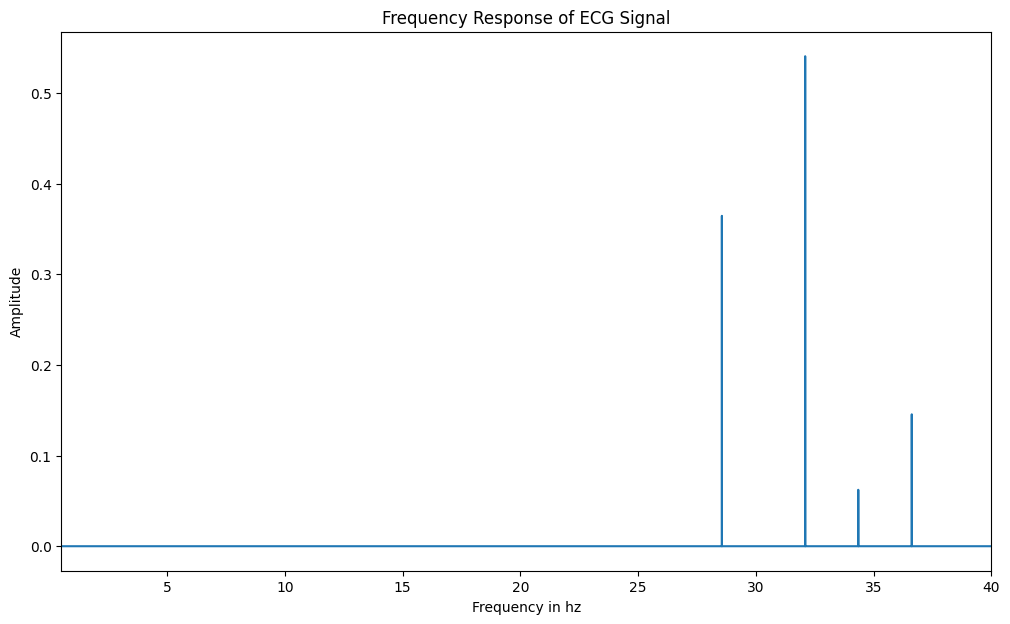

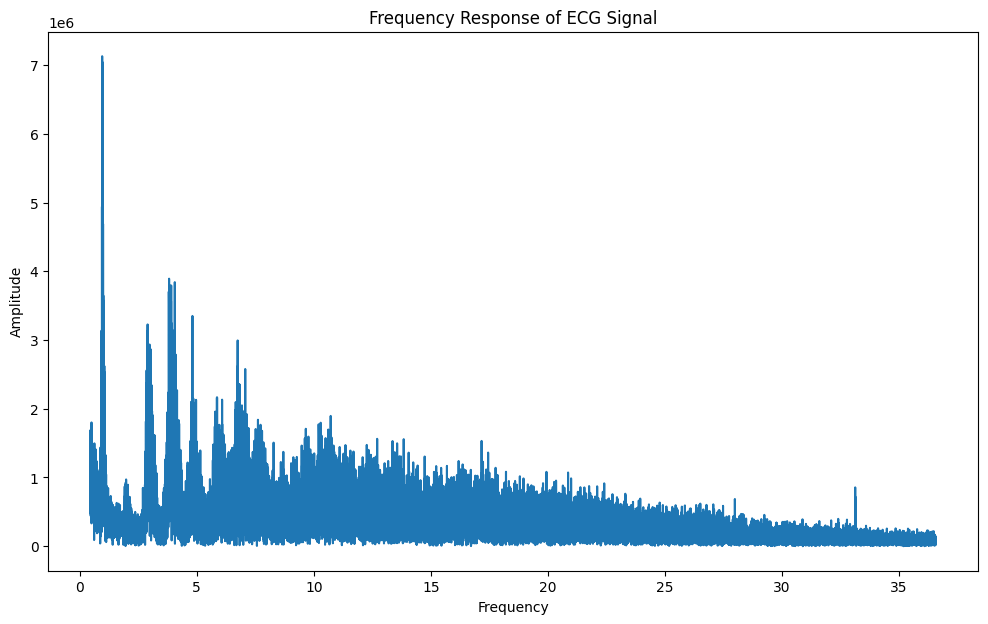

In [36]:
# code

yf = sp.fft.rfft(ECG_sig)

xf = sp.fft.fftfreq(N, T)[:N//2]

plt.figure(figsize=(12,7))
plt.title("Frequency Response of ECG Signal")
plt.xlabel("Frequency in hz")
plt.ylabel("Amplitude")
plt.plot(xf,2.0/N * np.abs(yf[0:N//2]))

removed_signal = np.where((yf < 0.5) | (yf > 40), 0, yf)

plt.figure(figsize=(12,7))
plt.title("Frequency Response of ECG Signal")
plt.xlabel("Frequency in hz")
plt.ylabel("Amplitude")
plt.xlim(0.5,40)
plt.plot(xf[0:N],2.0/N * np.abs(removed_signal[0:N//2]))

plt.figure(figsize=(12,7))
plt.title("Frequency Response of ECG Signal")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
lb, ub = int(Fs*0.5), (Fs*40)
plt.plot(xf[lb:ub], np.abs(yf)[lb:ub])


# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function. 

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

Text(0.5, 1.0, 'Butter Worth 2nd order Bandpass Filter 0.5-40 Hz.')

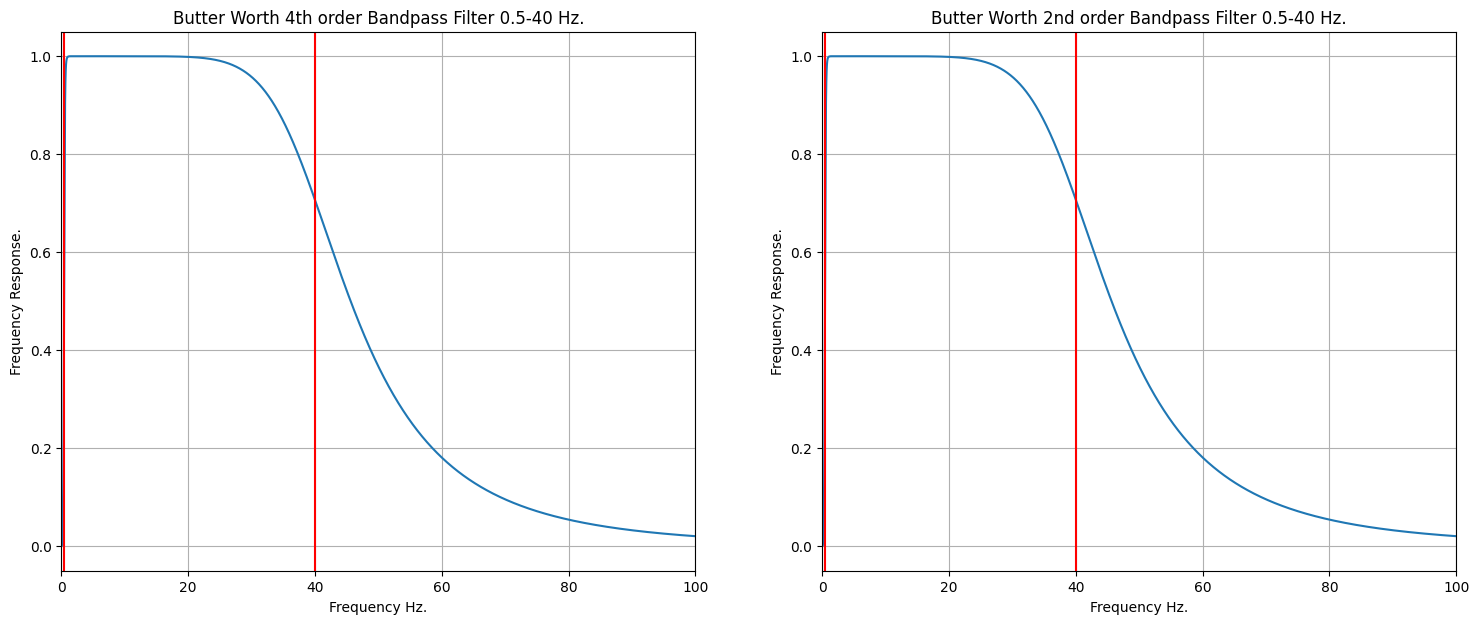

In [28]:
# code
b_pass_ord_4 = sp.signal.butter(4, Wn=[0.5, 40], btype="bandpass",fs=Fs)
w4, h4 = sp.signal.freqz(*b_pass_ord_4, fs=Fs, worN=8000)


b_pass_ord_2 = sp.signal.butter(2, Wn=[0.5, 40], btype="bandpass",fs=Fs)
w2, h2 = sp.signal.freqz(*b_pass_ord_4, fs=Fs, worN=8000)


fig, axes = plt.subplots(1,2, figsize=(18,7))
axes[0].plot(w4,np.abs(h4))
axes[0].grid()
axes[0].axvline(0.5,color="red")
axes[0].axvline(40,color="red")
axes[0].set_xlabel("Frequency Hz.")
axes[0].set_ylabel("Frequency Response.")
axes[0].set_xlim(0,100)
axes[0].set_title(f"Butter Worth 4th order Bandpass Filter {0.5}-{40} Hz.")

axes[1].plot(w2,np.abs(h2))
axes[1].grid()
axes[1].axvline(0.5,color="red")
axes[1].axvline(40,color="red")
axes[1].set_xlabel("Frequency Hz.")
axes[1].set_ylabel("Frequency Response.")
axes[1].set_xlim(0,100)
axes[1].set_title(f"Butter Worth 2nd order Bandpass Filter {0.5}-{40} Hz.")


## Observations:

# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

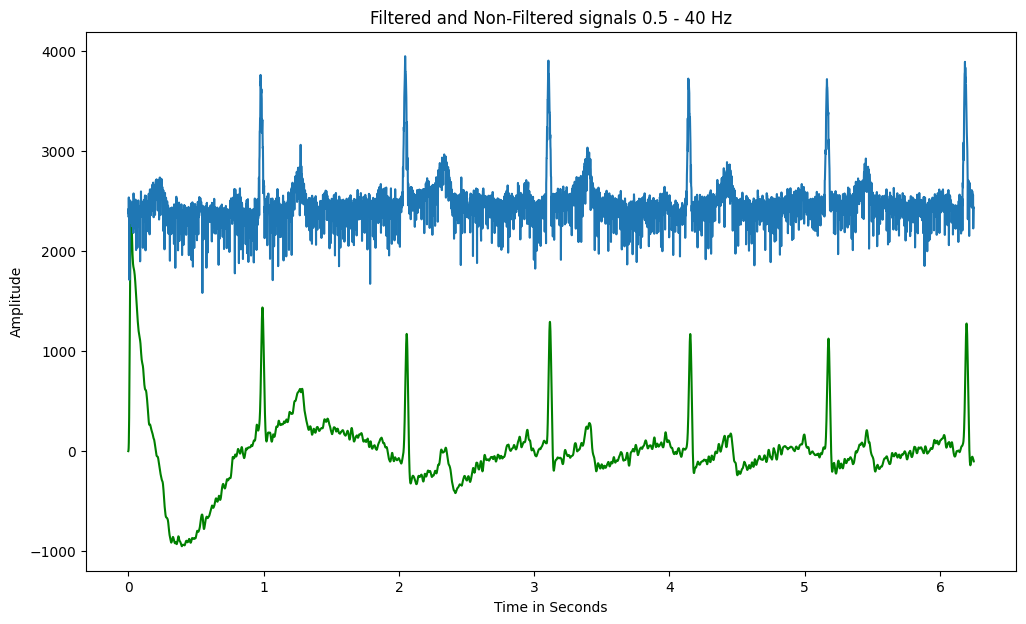

In [38]:
#code

filtered_signal = sp.signal.lfilter(*b_pass_ord_4, ECG_sig)

plt.figure(figsize=(12,7))

plt.plot(t[:5000], filtered_signal[:5000], color="green")
plt.plot(t[:5000], ECG_sig[:5000])

plt.xlabel("Time in Seconds")
plt.ylabel("Amplitude")
plt.title("Filtered and Non-Filtered signals 0.5 - 40 Hz")

plt.show()

## Observations:

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

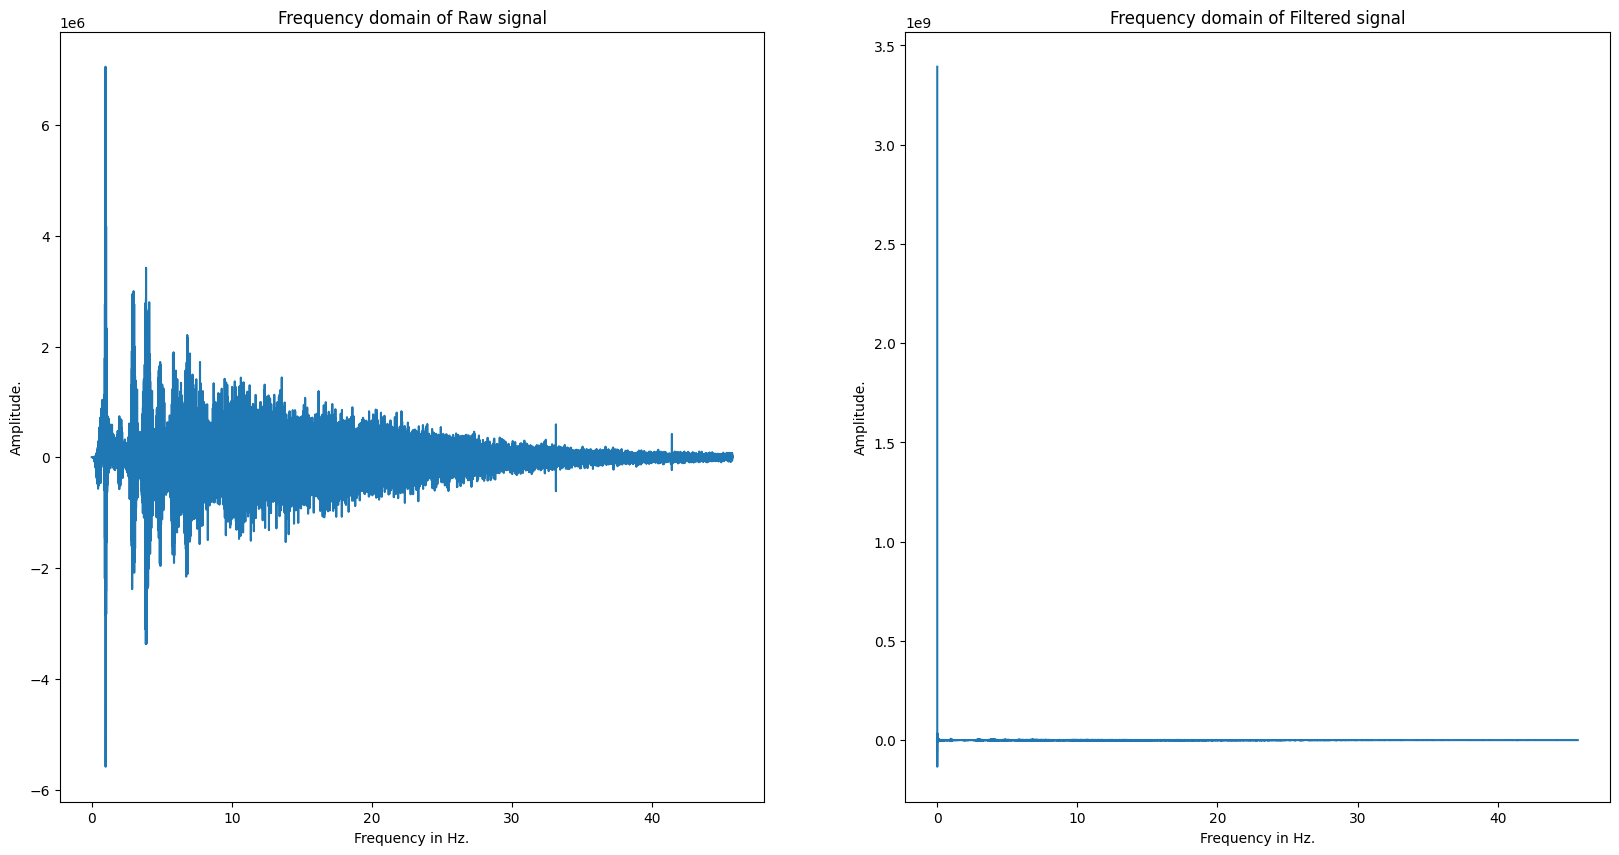

In [46]:
#code


x = sp.fft.rfftfreq(N, 1/Fs)
fy_filtered = sp.fft.rfft(filtered_signal)
fy = sp.fft.rfft(ECG_sig)


fig, axes = plt.subplots(1,2,figsize=(20,10))

axes[0].plot(x[:Fs*50], fy_filtered[:Fs*50])
axes[1].plot(x[:Fs*50], fy[:Fs*50])

axes[0].set_title("Frequency domain of Raw signal")
axes[1].set_title("Frequency domain of Filtered signal")
axes[0].set_xlabel("Frequency in Hz.")
axes[1].set_xlabel("Frequency in Hz.")
axes[0].set_ylabel("Amplitude.")
axes[1].set_ylabel("Amplitude.")
plt.show()


## Observations:

# QRS Detection 
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


In [40]:
#still need to locally install biosppy
#code
# !pip install biosppy # Installed locally don't need to install on each run. 
import biosppy 
from biosppy.signals import ecg 

ERROR: You must give at least one requirement to install (see "pip help install")


Data shows a BPM of 62.459999999999994


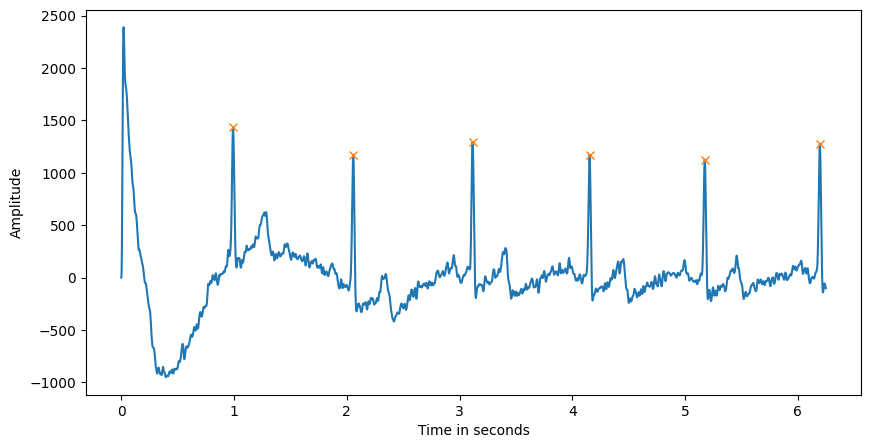

In [51]:
peaks = ecg.hamilton_segmenter(filtered_signal[:5000], Fs)[0]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(t[:5000], filtered_signal[:5000])
ax.set_xlabel("Time in seconds")
ax.set_ylabel("Amplitude")


time_btwn_peaks = [np.abs(peaks[i]-peaks[i+1]) for i in range(len(peaks)-1)]

ax.plot(peaks/Fs, filtered_signal[peaks], 'x')

print(f"Data shows a BPM of {np.mean(time_btwn_peaks)/Fs*60}")

## Observations:

ECG signals in real life a noisy and can greatly affect the diagnosis and filtering techniques like butterworth and chebychev greatly help in lowering noise and with higher order filters the the desired frequency can be finely tuned. 